In [1]:
#Setup

import time
import numpy as np
import matplotlib.pyplot as plt
from asgn2.classifiers.fc_net import *
import data_getter as dg
from asgn2.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))


In [4]:
# Load the (preprocessed) cities data.

data = dg.get_full_data()
for k, v in data.iteritems():
  print '%s: ' % k, v.shape
print data.keys()


y_test_Orlando:  (800,)
X_val:  (2400, 60)
X_train:  (13200, 60)
X_test_PGH:  (800, 60)
y_test_NYC:  (800,)
y_test_PGH:  (800,)
X_test_Orlando:  (800, 60)
X_test_NYC:  (800, 60)
y_val:  (2400,)
y_train:  (13200,)
['y_test_Orlando', 'X_val', 'X_train', 'X_test_PGH', 'y_test_NYC', 'y_test_PGH', 'X_test_Orlando', 'X_test_NYC', 'y_val', 'y_train']


In [5]:
# Normalize and zero-mean the data

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(data['X_train'], axis=0, keepdims=True)
data['X_train'] -= mean_feat
data['X_val'] -= mean_feat
data['X_test_PGH'] -= mean_feat
data['X_test_Orlando'] -= mean_feat
data['X_test_NYC'] -= mean_feat


print data['X_train'].shape
print data['X_val'].shape
print data['X_test_PGH'].shape
print data['X_test_Orlando'].shape
print data['X_test_NYC'].shape


(13200, 60)
(2400, 60)
(800, 60)
(800, 60)
(800, 60)


# Train a good model!
Train the best fully-connected model that you can on CIFAR-10, storing your best model in the `best_model` variable. We require you to get at least 50% accuracy on the validation set using a fully-connected net.

If you are careful it should be possible to get accuracies above 55%, but we don't require it for this part and won't assign extra credit for doing so. Later in the assignment we will ask you to train the best convolutional network that you can on CIFAR-10, and we would prefer that you spend your effort working on convolutional nets rather than fully-connected nets.

You might find it useful to complete the `BatchNormalization.ipynb` and `Dropout.ipynb` notebooks before completing this part, since those techniques can help you train powerful models.

(Iteration 1 / 1320) loss: 1.098612
(Epoch 0 / 20) train acc: 0.321000; val_acc: 0.333333
(Epoch 1 / 20) train acc: 0.795000; val_acc: 0.767917
(Iteration 101 / 1320) loss: 0.603517
(Epoch 2 / 20) train acc: 0.806000; val_acc: 0.803750
(Epoch 3 / 20) train acc: 0.837000; val_acc: 0.816250
(Iteration 201 / 1320) loss: 0.509676
(Epoch 4 / 20) train acc: 0.880000; val_acc: 0.846667
(Iteration 301 / 1320) loss: 0.314123
(Epoch 5 / 20) train acc: 0.865000; val_acc: 0.810833
(Epoch 6 / 20) train acc: 0.875000; val_acc: 0.839167
(Iteration 401 / 1320) loss: 0.258350
(Epoch 7 / 20) train acc: 0.880000; val_acc: 0.839583
(Iteration 501 / 1320) loss: 0.383157
(Epoch 8 / 20) train acc: 0.913000; val_acc: 0.871667
(Epoch 9 / 20) train acc: 0.914000; val_acc: 0.860833
(Iteration 601 / 1320) loss: 0.216029
(Epoch 10 / 20) train acc: 0.930000; val_acc: 0.874167
(Iteration 701 / 1320) loss: 0.260529
(Epoch 11 / 20) train acc: 0.942000; val_acc: 0.883333
(Epoch 12 / 20) train acc: 0.934000; val_acc: 0.

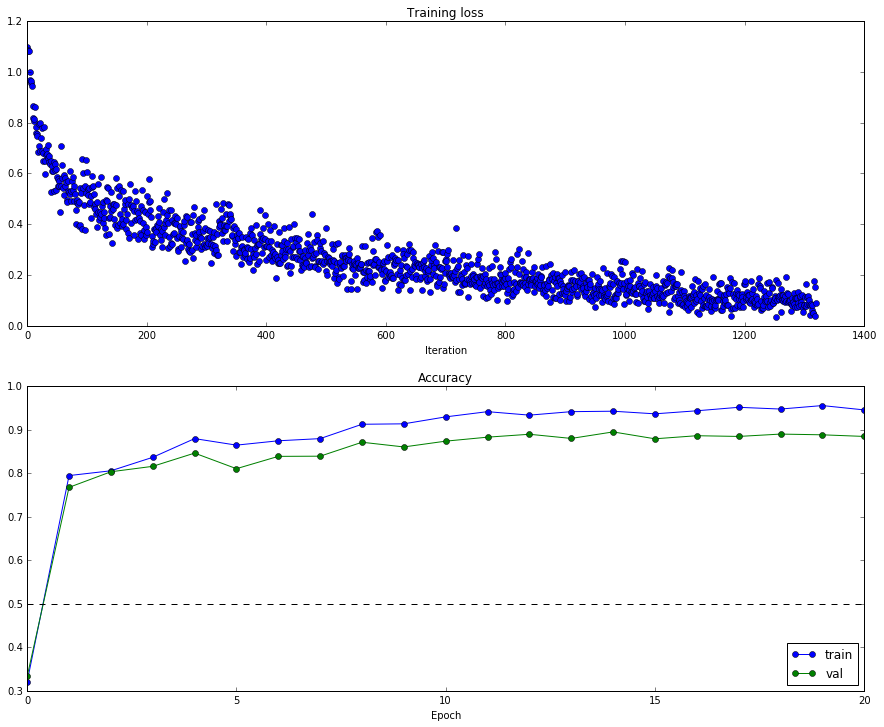

In [15]:
best_model = None
################################################################################
# TODO: Train the best FullyConnectedNet that you can on CIFAR-10. You might   #
# batch normalization and dropout useful. Store your best model in the         #
# best_model variable.                                                         #
################################################################################
best_model = FullyConnectedNet([400, 250, 100, 50], 
                          weight_scale=1e-4, use_batchnorm=True, input_dim=60,
                          reg=1e-6)
solver = None

##############################################################################
# TODO: Use a Solver instance to train a TwoLayerNet that achieves at least  #
# 50% accuracy on the validation set.                                        #
##############################################################################

full_data = {
    'X_train': data['X_train'],
    'y_train': data['y_train'],
    'X_val': data['X_val'],
    'y_val': data['y_val']
}

solver = Solver(best_model, full_data,
                  update_rule='adam',
                  optim_config={
                    'learning_rate': 1e-2,
                  },
                  lr_decay=0.95,
                  num_epochs=20, batch_size=200,
                  print_every=100,
                  verbose=True)

solver.train()

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Test you model
Run your best model on the validation and test sets. You should achieve above 50% accuracy on the validation set.

In [18]:
y_test_pred_PGH = np.argmax(best_model.loss(data['X_test_PGH']), axis=1)
y_test_pred_Orlando = np.argmax(best_model.loss(data['X_test_Orlando']), axis=1)
y_test_pred_NYC = np.argmax(best_model.loss(data['X_test_NYC']), axis=1)

print 'Test set accuracy: ', (y_test_pred_PGH == data['y_test_PGH']).mean()
print 'Test set accuracy: ', (y_test_pred_Orlando == data['y_test_Orlando']).mean()
print 'Test set accuracy: ', (y_test_pred_NYC == data['y_test_NYC']).mean()

Test set accuracy:  0.82125
Test set accuracy:  0.86125
Test set accuracy:  0.94625
